In [1]:
import os
os.getcwd()

'g:\\My Drive\\KANTOR\\2023\\dieng\\data\\OBS\\AWS BATUR'

In [41]:
import pandas as pd

df = pd.read_csv("G:/My Drive/KANTOR/2023/dieng/data/OBS/Data_litbang/pws_arjuna.csv", sep=';')
#df = pd.read_csv("G:/My Drive/KANTOR/2023/dieng/data/OBS/Data_litbang/pws_sikidang.csv", sep=';')

#df1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    23523 non-null  object 
 1   RECORD       23523 non-null  int64  
 2   BattV_Min    23523 non-null  int64  
 3   WindDir      23523 non-null  float64
 4   WS_knot      23523 non-null  float64
 5   AirTC        23523 non-null  float64
 6   RH           23523 non-null  float64
 7   BP_mbar      23523 non-null  float64
 8   Rain_mm_Tot  23523 non-null  float64
 9   HAmount      23523 non-null  float64
 10  WS_ms        0 non-null      float64
dtypes: float64(8), int64(2), object(1)
memory usage: 2.0+ MB


In [42]:
# Convert columns to datetime format
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df

TIMESTAMP  RECORD  BattV_Min   WindDir  WS_knot  AirTC     RH  \
0     2023-09-21 10:37:00    4601        234  4.470841     17.4   64.7  800.5   
1     2023-09-21 10:38:00    4602        203  8.358529     17.3   65.6  800.4   
2     2023-09-21 10:39:00    4603        222  7.386607     17.2   65.4  800.4   
3     2023-09-21 10:40:00    4604        227  6.414685     17.3   67.7  800.4   
4     2023-09-21 10:41:00    4605        234  6.025916     17.3   66.5  800.4   
...                   ...     ...        ...       ...      ...    ...    ...   
23518 2023-09-29 14:40:00   16364        163  2.526997     20.3   56.2  800.7   
23519 2023-09-29 14:41:00   16365        124  4.665226     20.3   55.1  800.7   
23520 2023-09-29 14:42:00   16366        165  5.053994     20.2   57.0  800.6   
23521 2023-09-29 14:43:00   16367        110  3.498919     20.1   60.2  800.6   
23522 2023-09-29 14:44:00   16368        181  7.386607     20.2   62.1  800.6   

       BP_mbar  Rain_mm_Tot  HAmount  WS_ms  
0         0.00         21.0      2.3    NaN  
1         0.00         20.7      4.3    NaN  
2         0.00         20.2      3.8    NaN  
3         0.00         20.2      3.3    NaN  
4         0.00         20.2      3.1    NaN  
...        ...          ...      ...    ...  
23518     0.12         25.4      1.3    NaN  
23519     0.12         25.1      2.4    NaN  
23520     0.12         25.1      2.6    NaN  
23521     0.12         25.1      1.8    NaN  
23522     0.12         24.9      3.8    NaN  

[23523 rows x 11 columns]

In [43]:
# Loop through all columns and convert object-type columns to float
for col in df.columns:
    if pd.api.types.is_object_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' will convert non-numeric values to NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TIMESTAMP    23523 non-null  datetime64[ns]
 1   RECORD       23523 non-null  int64         
 2   BattV_Min    23523 non-null  int64         
 3   WindDir      23523 non-null  float64       
 4   WS_knot      23523 non-null  float64       
 5   AirTC        23523 non-null  float64       
 6   RH           23523 non-null  float64       
 7   BP_mbar      23523 non-null  float64       
 8   Rain_mm_Tot  23523 non-null  float64       
 9   HAmount      23523 non-null  float64       
 10  WS_ms        0 non-null      float64       
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 2.0 MB


In [45]:
# Count NaN values in the DataFrame
nan_count = df.isna().sum()

# Print the count of NaN values for each column
print(nan_count)

TIMESTAMP          0
RECORD             0
BattV_Min          0
WindDir            0
WS_knot            0
AirTC              0
RH                 0
BP_mbar            0
Rain_mm_Tot        0
HAmount            0
WS_ms          23523
dtype: int64


In [47]:
df = df.set_index('TIMESTAMP')

In [53]:
df

RECORD  BattV_Min   WindDir  WS_knot  AirTC     RH  \
TIMESTAMP                                                                 
2023-09-21 10:37:00    4601        234  4.470841     17.4   64.7  800.5   
2023-09-21 10:38:00    4602        203  8.358529     17.3   65.6  800.4   
2023-09-21 10:39:00    4603        222  7.386607     17.2   65.4  800.4   
2023-09-21 10:40:00    4604        227  6.414685     17.3   67.7  800.4   
2023-09-21 10:41:00    4605        234  6.025916     17.3   66.5  800.4   
...                     ...        ...       ...      ...    ...    ...   
2023-09-29 14:40:00   16364        163  2.526997     20.3   56.2  800.7   
2023-09-29 14:41:00   16365        124  4.665226     20.3   55.1  800.7   
2023-09-29 14:42:00   16366        165  5.053994     20.2   57.0  800.6   
2023-09-29 14:43:00   16367        110  3.498919     20.1   60.2  800.6   
2023-09-29 14:44:00   16368        181  7.386607     20.2   62.1  800.6   

                     BP_mbar  Rain_mm_Tot  HAmount  WS_ms  
TIMESTAMP                                                  
2023-09-21 10:37:00     0.00         21.0      2.3    NaN  
2023-09-21 10:38:00     0.00         20.7      4.3    NaN  
2023-09-21 10:39:00     0.00         20.2      3.8    NaN  
2023-09-21 10:40:00     0.00         20.2      3.3    NaN  
2023-09-21 10:41:00     0.00         20.2      3.1    NaN  
...                      ...          ...      ...    ...  
2023-09-29 14:40:00     0.12         25.4      1.3    NaN  
2023-09-29 14:41:00     0.12         25.1      2.4    NaN  
2023-09-29 14:42:00     0.12         25.1      2.6    NaN  
2023-09-29 14:43:00     0.12         25.1      1.8    NaN  
2023-09-29 14:44:00     0.12         24.9      3.8    NaN  

[23523 rows x 10 columns]

In [56]:
import matplotlib.pyplot as plt
# Set the 'B' column as the index
#df = df.set_index('TIMESTAMP')

# Plot the data
# Specify the date from which you want to plot data
# start_date = pd.to_datetime('2023-09-21')

# # Filter the DataFrame for data from the start_date onward
# subset = df[df.index >= start_date]

# Plot the selected data
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['WS_knot'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data from a Specific Date Onward')
plt.grid(True)
plt.show()

In [57]:
# Save the DataFrame to a CSV file with the index
df.to_csv('pws_arjuna.csv', index=True)

## LOAD DF DROPPED

In [13]:
import pandas as pd

df_raw = pd.read_csv("df_dropped.csv")

df_raw

ID STASIUN         NAMA STA      LAT        LNG  ELEVASI  \
0        STA2285        AWS Batur -7.20399  109.91158   2078.0   
1        STA2285        AWS Batur -7.20399  109.91158   2078.0   
2        STA2285        AWS Batur -7.20399  109.91158   2078.0   
3        STA2285        AWS Batur -7.20399  109.91158   2078.0   
4        STA2285        AWS Batur -7.20399  109.91158   2078.0   
...          ...              ...      ...        ...      ...   
54555    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54556    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54557    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54558    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54559    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   

                      TANGGAL   RR  WS AVG  WS MAX  WD AVG  TT AIR MAX  \
0      2022-08-05 09:50:00+00  0.0   0.345   1.514   208.6       21.84   
1      2022-08-05 10:00:00+00  0.0   1.662   2.713   175.2       21.84   
2      2022-08-05 10:10:00+00  0.0   1.476   2.846   192.2       21.84   
3      2022-08-05 10:20:00+00  0.0   0.780   1.198   137.3       21.84   
4      2022-08-05 10:30:00+00  0.0   0.758   1.136   148.3       21.84   
...                       ...  ...     ...     ...     ...         ...   
54555  2023-09-05 03:20:00+00  0.0   3.793   5.633   300.6       19.22   
54556  2023-09-05 03:30:00+00  0.0   3.289   5.380   207.1       19.22   
54557  2023-09-05 03:40:00+00  0.0   3.021   5.009   155.8       19.22   
54558  2023-09-05 03:50:00+00  0.0   3.133   4.908   313.5       19.22   
54559  2023-09-05 04:00:00+00  0.0   3.600   5.519   219.1       19.22   

       TT AIR AVG  TT AIR MIN  RH AVG    PP AIR   SR AVG  SR MAX  PH SEA  \
0           15.52       15.18   86.90  796.2658    84.70   249.7     NaN   
1           15.36       15.09   86.90  796.3821    74.56   249.7     NaN   
2           14.92       14.69   89.70  796.3670    44.77   249.7     NaN   
3           14.49       14.23   90.10  796.3774    22.31   249.7     NaN   
4           13.94       13.68   91.00  796.4604    10.80   249.7     NaN   
...           ...         ...     ...       ...      ...     ...     ...   
54555       17.87       14.16   73.06  797.3772  1005.00  1138.0     NaN   
54556       17.57       14.16   73.64  797.3764   703.30  1138.0     NaN   
54557       16.96       14.16   75.19  797.3763   588.70  1200.0     NaN   
54558       17.82       14.16   72.75  797.3602   875.00  1234.0     NaN   
54559       17.63       14.16   73.58  797.3338  1087.00  1234.0     NaN   

                       date_time  
0      2022-08-05 09:50:00+00:00  
1      2022-08-05 10:00:00+00:00  
2      2022-08-05 10:10:00+00:00  
3      2022-08-05 10:20:00+00:00  
4      2022-08-05 10:30:00+00:00  
...                          ...  
54555  2023-09-05 03:20:00+00:00  
54556  2023-09-05 03:30:00+00:00  
54557  2023-09-05 03:40:00+00:00  
54558  2023-09-05 03:50:00+00:00  
54559  2023-09-05 04:00:00+00:00  

[54560 rows x 19 columns]

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121891 entries, 0 to 121890
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID STASIUN  121891 non-null  object 
 1   NAMA STA    121891 non-null  object 
 2   LAT         121891 non-null  float64
 3   LNG         121891 non-null  float64
 4   ELEVASI     109521 non-null  float64
 5   TANGGAL     121891 non-null  object 
 6   RR          94265 non-null   float64
 7   WS AVG      111674 non-null  float64
 8   WS MAX      54604 non-null   float64
 9   WD AVG      111674 non-null  float64
 10  TT AIR MAX  54604 non-null   float64
 11  TT AIR AVG  110502 non-null  float64
 12  TT AIR MIN  54604 non-null   float64
 13  RH AVG      94259 non-null   float64
 14  PP AIR      54604 non-null   float64
 15  SR AVG      111674 non-null  float64
 16  SR MAX      54604 non-null   float64
 17  PH SEA      44544 non-null   float64
 18  date_time   121891 non-null  object 
dtypes:

In [9]:
# Filter rows where 'Temperature' is greater than or equal to 0
df = df_raw[df_raw['TT AIR MIN'] >= -10]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54560 entries, 65598 to 121890
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID STASIUN  54560 non-null  object 
 1   NAMA STA    54560 non-null  object 
 2   LAT         54560 non-null  float64
 3   LNG         54560 non-null  float64
 4   ELEVASI     54560 non-null  float64
 5   TANGGAL     54560 non-null  object 
 6   RR          54560 non-null  float64
 7   WS AVG      54560 non-null  float64
 8   WS MAX      54560 non-null  float64
 9   WD AVG      54560 non-null  float64
 10  TT AIR MAX  54560 non-null  float64
 11  TT AIR AVG  54560 non-null  float64
 12  TT AIR MIN  54560 non-null  float64
 13  RH AVG      54560 non-null  float64
 14  PP AIR      54560 non-null  float64
 15  SR AVG      54560 non-null  float64
 16  SR MAX      54560 non-null  float64
 17  PH SEA      0 non-null      float64
 18  date_time   54560 non-null  object 
dtypes: float64(15), object(4)

In [10]:
df

ID STASIUN         NAMA STA      LAT        LNG  ELEVASI  \
65598     STA2285        AWS Batur -7.20399  109.91158   2078.0   
65599     STA2285        AWS Batur -7.20399  109.91158   2078.0   
65600     STA2285        AWS Batur -7.20399  109.91158   2078.0   
65601     STA2285        AWS Batur -7.20399  109.91158   2078.0   
65602     STA2285        AWS Batur -7.20399  109.91158   2078.0   
...           ...              ...      ...        ...      ...   
121886    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
121887    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
121888    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
121889    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
121890    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   

                       TANGGAL   RR  WS AVG  WS MAX  WD AVG  TT AIR MAX  \
65598   2022-08-05 09:50:00+00  0.0   0.345   1.514   208.6       21.84   
65599   2022-08-05 10:00:00+00  0.0   1.662   2.713   175.2       21.84   
65600   2022-08-05 10:10:00+00  0.0   1.476   2.846   192.2       21.84   
65601   2022-08-05 10:20:00+00  0.0   0.780   1.198   137.3       21.84   
65602   2022-08-05 10:30:00+00  0.0   0.758   1.136   148.3       21.84   
...                        ...  ...     ...     ...     ...         ...   
121886  2023-09-05 03:20:00+00  0.0   3.793   5.633   300.6       19.22   
121887  2023-09-05 03:30:00+00  0.0   3.289   5.380   207.1       19.22   
121888  2023-09-05 03:40:00+00  0.0   3.021   5.009   155.8       19.22   
121889  2023-09-05 03:50:00+00  0.0   3.133   4.908   313.5       19.22   
121890  2023-09-05 04:00:00+00  0.0   3.600   5.519   219.1       19.22   

        TT AIR AVG  TT AIR MIN  RH AVG    PP AIR   SR AVG  SR MAX  PH SEA  \
65598        15.52       15.18   86.90  796.2658    84.70   249.7     NaN   
65599        15.36       15.09   86.90  796.3821    74.56   249.7     NaN   
65600        14.92       14.69   89.70  796.3670    44.77   249.7     NaN   
65601        14.49       14.23   90.10  796.3774    22.31   249.7     NaN   
65602        13.94       13.68   91.00  796.4604    10.80   249.7     NaN   
...            ...         ...     ...       ...      ...     ...     ...   
121886       17.87       14.16   73.06  797.3772  1005.00  1138.0     NaN   
121887       17.57       14.16   73.64  797.3764   703.30  1138.0     NaN   
121888       16.96       14.16   75.19  797.3763   588.70  1200.0     NaN   
121889       17.82       14.16   72.75  797.3602   875.00  1234.0     NaN   
121890       17.63       14.16   73.58  797.3338  1087.00  1234.0     NaN   

                        date_time  
65598   2022-08-05 09:50:00+00:00  
65599   2022-08-05 10:00:00+00:00  
65600   2022-08-05 10:10:00+00:00  
65601   2022-08-05 10:20:00+00:00  
65602   2022-08-05 10:30:00+00:00  
...                           ...  
121886  2023-09-05 03:20:00+00:00  
121887  2023-09-05 03:30:00+00:00  
121888  2023-09-05 03:40:00+00:00  
121889  2023-09-05 03:50:00+00:00  
121890  2023-09-05 04:00:00+00:00  

[54560 rows x 19 columns]

In [11]:
# Reset the index starting from 0
df.reset_index(drop=True, inplace=True)
df

ID STASIUN         NAMA STA      LAT        LNG  ELEVASI  \
0        STA2285        AWS Batur -7.20399  109.91158   2078.0   
1        STA2285        AWS Batur -7.20399  109.91158   2078.0   
2        STA2285        AWS Batur -7.20399  109.91158   2078.0   
3        STA2285        AWS Batur -7.20399  109.91158   2078.0   
4        STA2285        AWS Batur -7.20399  109.91158   2078.0   
...          ...              ...      ...        ...      ...   
54555    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54556    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54557    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54558    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54559    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   

                      TANGGAL   RR  WS AVG  WS MAX  WD AVG  TT AIR MAX  \
0      2022-08-05 09:50:00+00  0.0   0.345   1.514   208.6       21.84   
1      2022-08-05 10:00:00+00  0.0   1.662   2.713   175.2       21.84   
2      2022-08-05 10:10:00+00  0.0   1.476   2.846   192.2       21.84   
3      2022-08-05 10:20:00+00  0.0   0.780   1.198   137.3       21.84   
4      2022-08-05 10:30:00+00  0.0   0.758   1.136   148.3       21.84   
...                       ...  ...     ...     ...     ...         ...   
54555  2023-09-05 03:20:00+00  0.0   3.793   5.633   300.6       19.22   
54556  2023-09-05 03:30:00+00  0.0   3.289   5.380   207.1       19.22   
54557  2023-09-05 03:40:00+00  0.0   3.021   5.009   155.8       19.22   
54558  2023-09-05 03:50:00+00  0.0   3.133   4.908   313.5       19.22   
54559  2023-09-05 04:00:00+00  0.0   3.600   5.519   219.1       19.22   

       TT AIR AVG  TT AIR MIN  RH AVG    PP AIR   SR AVG  SR MAX  PH SEA  \
0           15.52       15.18   86.90  796.2658    84.70   249.7     NaN   
1           15.36       15.09   86.90  796.3821    74.56   249.7     NaN   
2           14.92       14.69   89.70  796.3670    44.77   249.7     NaN   
3           14.49       14.23   90.10  796.3774    22.31   249.7     NaN   
4           13.94       13.68   91.00  796.4604    10.80   249.7     NaN   
...           ...         ...     ...       ...      ...     ...     ...   
54555       17.87       14.16   73.06  797.3772  1005.00  1138.0     NaN   
54556       17.57       14.16   73.64  797.3764   703.30  1138.0     NaN   
54557       16.96       14.16   75.19  797.3763   588.70  1200.0     NaN   
54558       17.82       14.16   72.75  797.3602   875.00  1234.0     NaN   
54559       17.63       14.16   73.58  797.3338  1087.00  1234.0     NaN   

                       date_time  
0      2022-08-05 09:50:00+00:00  
1      2022-08-05 10:00:00+00:00  
2      2022-08-05 10:10:00+00:00  
3      2022-08-05 10:20:00+00:00  
4      2022-08-05 10:30:00+00:00  
...                          ...  
54555  2023-09-05 03:20:00+00:00  
54556  2023-09-05 03:30:00+00:00  
54557  2023-09-05 03:40:00+00:00  
54558  2023-09-05 03:50:00+00:00  
54559  2023-09-05 04:00:00+00:00  

[54560 rows x 19 columns]

In [12]:
# Save the DataFrame to a CSV file
df.to_csv("df_clean.csv", index=False)  # Set index=False to exclude the index column in the CSV


## LOAD DF CLEAN

In [1]:
import pandas as pd

df = pd.read_csv("df_clean1.csv")

df

ID STASIUN         NAMA STA      LAT        LNG  ELEVASI  \
0        STA2285        AWS Batur -7.20399  109.91158   2078.0   
1        STA2285        AWS Batur -7.20399  109.91158   2078.0   
2        STA2285        AWS Batur -7.20399  109.91158   2078.0   
3        STA2285        AWS Batur -7.20399  109.91158   2078.0   
4        STA2285        AWS Batur -7.20399  109.91158   2078.0   
...          ...              ...      ...        ...      ...   
54532    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54533    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54534    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54535    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   
54536    STA2285  AWS Batur Dieng -7.20399  109.91158   2078.0   

                      TANGGAL   RR  WS AVG  WS MAX  WD AVG  TT AIR MAX  \
0      2022-08-05 09:50:00+00  0.0   0.345   1.514   208.6       21.84   
1      2022-08-05 10:00:00+00  0.0   1.662   2.713   175.2       21.84   
2      2022-08-05 10:10:00+00  0.0   1.476   2.846   192.2       21.84   
3      2022-08-05 10:20:00+00  0.0   0.780   1.198   137.3       21.84   
4      2022-08-05 10:30:00+00  0.0   0.758   1.136   148.3       21.84   
...                       ...  ...     ...     ...     ...         ...   
54532  2023-09-05 03:20:00+00  0.0   3.793   5.633   300.6       19.22   
54533  2023-09-05 03:30:00+00  0.0   3.289   5.380   207.1       19.22   
54534  2023-09-05 03:40:00+00  0.0   3.021   5.009   155.8       19.22   
54535  2023-09-05 03:50:00+00  0.0   3.133   4.908   313.5       19.22   
54536  2023-09-05 04:00:00+00  0.0   3.600   5.519   219.1       19.22   

       TT AIR AVG  TT AIR MIN  RH AVG    PP AIR   SR AVG  SR MAX  PH SEA  \
0           15.52       15.18   86.90  796.2658    84.70   249.7     NaN   
1           15.36       15.09   86.90  796.3821    74.56   249.7     NaN   
2           14.92       14.69   89.70  796.3670    44.77   249.7     NaN   
3           14.49       14.23   90.10  796.3774    22.31   249.7     NaN   
4           13.94       13.68   91.00  796.4604    10.80   249.7     NaN   
...           ...         ...     ...       ...      ...     ...     ...   
54532       17.87       14.16   73.06  797.3772  1005.00  1138.0     NaN   
54533       17.57       14.16   73.64  797.3764   703.30  1138.0     NaN   
54534       16.96       14.16   75.19  797.3763   588.70  1200.0     NaN   
54535       17.82       14.16   72.75  797.3602   875.00  1234.0     NaN   
54536       17.63       14.16   73.58  797.3338  1087.00  1234.0     NaN   

                       date_time  
0      2022-08-05 09:50:00+00:00  
1      2022-08-05 10:00:00+00:00  
2      2022-08-05 10:10:00+00:00  
3      2022-08-05 10:20:00+00:00  
4      2022-08-05 10:30:00+00:00  
...                          ...  
54532  2023-09-05 03:20:00+00:00  
54533  2023-09-05 03:30:00+00:00  
54534  2023-09-05 03:40:00+00:00  
54535  2023-09-05 03:50:00+00:00  
54536  2023-09-05 04:00:00+00:00  

[54537 rows x 19 columns]

In [17]:
# df = df[(df[['TT AIR MIN']] != 0).all(axis=1)]

In [18]:
# Save the DataFrame to a CSV file
# df.to_csv('df_clean1.csv', index=False)

In [2]:
# Convert the 'date' column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54537 entries, 0 to 54536
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   ID STASIUN  54537 non-null  object             
 1   NAMA STA    54537 non-null  object             
 2   LAT         54537 non-null  float64            
 3   LNG         54537 non-null  float64            
 4   ELEVASI     54537 non-null  float64            
 5   TANGGAL     54537 non-null  object             
 6   RR          54537 non-null  float64            
 7   WS AVG      54537 non-null  float64            
 8   WS MAX      54537 non-null  float64            
 9   WD AVG      54537 non-null  float64            
 10  TT AIR MAX  54537 non-null  float64            
 11  TT AIR AVG  54537 non-null  float64            
 12  TT AIR MIN  54537 non-null  float64            
 13  RH AVG      54537 non-null  float64            
 14  PP AIR      54537 non-null  float64   

In [26]:
df.columns

Index(['ID STASIUN', 'NAMA STA', 'LAT', 'LNG', 'ELEVASI', 'TANGGAL', 'RR',
       'WS AVG', 'WS MAX', 'WD AVG', 'TT AIR MAX', 'TT AIR AVG', 'TT AIR MIN',
       'RH AVG', 'PP AIR', 'SR AVG', 'SR MAX', 'PH SEA', 'date_time'],
      dtype='object')

In [3]:
df.set_index('date_time', inplace=True)
df

ID STASIUN         NAMA STA      LAT        LNG  \
date_time                                                                   
2022-08-05 09:50:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:00:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:10:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:20:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
2022-08-05 10:30:00+00:00    STA2285        AWS Batur -7.20399  109.91158   
...                              ...              ...      ...        ...   
2023-09-05 03:20:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 03:30:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 03:40:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 03:50:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   
2023-09-05 04:00:00+00:00    STA2285  AWS Batur Dieng -7.20399  109.91158   

                           ELEVASI                 TANGGAL   RR  WS AVG  \
date_time                                                                 
2022-08-05 09:50:00+00:00   2078.0  2022-08-05 09:50:00+00  0.0   0.345   
2022-08-05 10:00:00+00:00   2078.0  2022-08-05 10:00:00+00  0.0   1.662   
2022-08-05 10:10:00+00:00   2078.0  2022-08-05 10:10:00+00  0.0   1.476   
2022-08-05 10:20:00+00:00   2078.0  2022-08-05 10:20:00+00  0.0   0.780   
2022-08-05 10:30:00+00:00   2078.0  2022-08-05 10:30:00+00  0.0   0.758   
...                            ...                     ...  ...     ...   
2023-09-05 03:20:00+00:00   2078.0  2023-09-05 03:20:00+00  0.0   3.793   
2023-09-05 03:30:00+00:00   2078.0  2023-09-05 03:30:00+00  0.0   3.289   
2023-09-05 03:40:00+00:00   2078.0  2023-09-05 03:40:00+00  0.0   3.021   
2023-09-05 03:50:00+00:00   2078.0  2023-09-05 03:50:00+00  0.0   3.133   
2023-09-05 04:00:00+00:00   2078.0  2023-09-05 04:00:00+00  0.0   3.600   

                           WS MAX  WD AVG  TT AIR MAX  TT AIR AVG  TT AIR MIN  \
date_time                                                                       
2022-08-05 09:50:00+00:00   1.514   208.6       21.84       15.52       15.18   
2022-08-05 10:00:00+00:00   2.713   175.2       21.84       15.36       15.09   
2022-08-05 10:10:00+00:00   2.846   192.2       21.84       14.92       14.69   
2022-08-05 10:20:00+00:00   1.198   137.3       21.84       14.49       14.23   
2022-08-05 10:30:00+00:00   1.136   148.3       21.84       13.94       13.68   
...                           ...     ...         ...         ...         ...   
2023-09-05 03:20:00+00:00   5.633   300.6       19.22       17.87       14.16   
2023-09-05 03:30:00+00:00   5.380   207.1       19.22       17.57       14.16   
2023-09-05 03:40:00+00:00   5.009   155.8       19.22       16.96       14.16   
2023-09-05 03:50:00+00:00   4.908   313.5       19.22       17.82       14.16   
2023-09-05 04:00:00+00:00   5.519   219.1       19.22       17.63       14.16   

                           RH AVG    PP AIR   SR AVG  SR MAX  PH SEA  
date_time                                                             
2022-08-05 09:50:00+00:00   86.90  796.2658    84.70   249.7     NaN  
2022-08-05 10:00:00+00:00   86.90  796.3821    74.56   249.7     NaN  
2022-08-05 10:10:00+00:00   89.70  796.3670    44.77   249.7     NaN  
2022-08-05 10:20:00+00:00   90.10  796.3774    22.31   249.7     NaN  
2022-08-05 10:30:00+00:00   91.00  796.4604    10.80   249.7     NaN  
...                           ...       ...      ...     ...     ...  
2023-09-05 03:20:00+00:00   73.06  797.3772  1005.00  1138.0     NaN  
2023-09-05 03:30:00+00:00   73.64  797.3764   703.30  1138.0     NaN  
2023-09-05 03:40:00+00:00   75.19  797.3763   588.70  1200.0     NaN  
2023-09-05 03:50:00+00:00   72.75  797.3602   875.00  1234.0     NaN  
2023-09-05 04:00:00+00:00   73.58  797.3338  1087.00  1234.0     NaN  

[54537 rows x 18 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54537 entries, 2022-08-05 09:50:00+00:00 to 2023-09-05 04:00:00+00:00
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID STASIUN  54537 non-null  object 
 1   NAMA STA    54537 non-null  object 
 2   LAT         54537 non-null  float64
 3   LNG         54537 non-null  float64
 4   ELEVASI     54537 non-null  float64
 5   TANGGAL     54537 non-null  object 
 6   RR          54537 non-null  float64
 7   WS AVG      54537 non-null  float64
 8   WS MAX      54537 non-null  float64
 9   WD AVG      54537 non-null  float64
 10  TT AIR MAX  54537 non-null  float64
 11  TT AIR AVG  54537 non-null  float64
 12  TT AIR MIN  54537 non-null  float64
 13  RH AVG      54537 non-null  float64
 14  PP AIR      54537 non-null  float64
 15  SR AVG      54537 non-null  float64
 16  SR MAX      54537 non-null  float64
 17  PH SEA      0 non-null      float64
dtypes: float64(15), object(3)
m

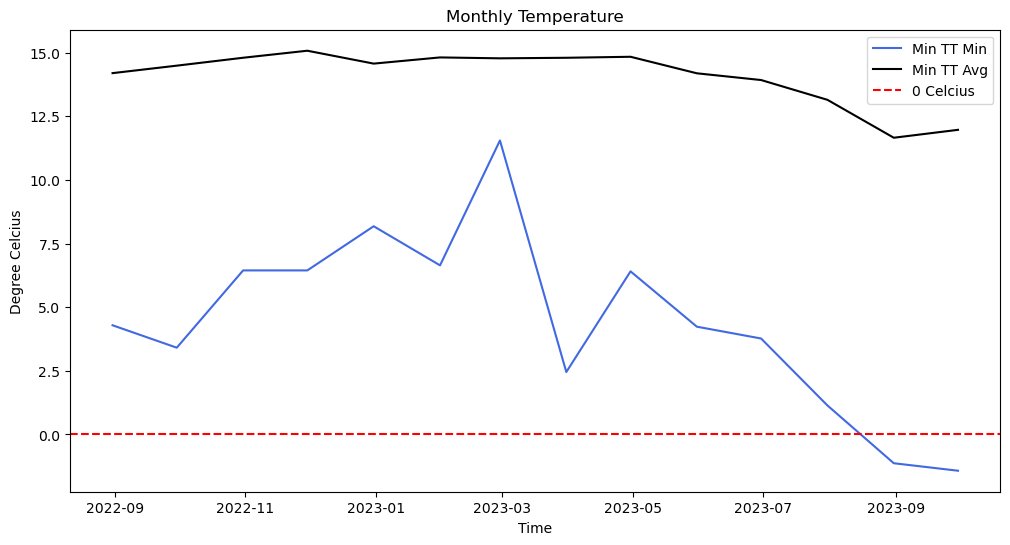

In [44]:
import matplotlib.pyplot as plt
# Resample the data to monthly frequency and aggregate the values
monthly_resampled_min = df.resample('M').min()
monthly_resampled_mean = df["TT AIR AVG"].resample('M').mean()


# Create a figure
plt.figure(figsize=(12, 6))

# Plot the first dataset
plt.plot(monthly_resampled_min.index, monthly_resampled_min["TT AIR MIN"], color='royalblue', label='Min TT Min')

# Plot the second dataset on the same y-axis
plt.plot(monthly_resampled_mean.index, monthly_resampled_mean, color='black', label='Min TT Avg')

# Add a horizontal line at y = 10
plt.axhline(y=0, color='red', linestyle='--', label='0 Celcius')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Degree Celcius')
plt.legend()

plt.title('Monthly Temperature')
plt.show()

In [8]:
import matplotlib.pyplot as plt
# Resample the data to monthly frequency and aggregate the values
monthly_resampled_min = df.resample('D').min()
monthly_resampled_mean = df["TT AIR AVG"].resample('D').mean()


# Create a figure
plt.figure(figsize=(12, 6))

# Plot the first dataset
plt.plot(monthly_resampled_min.index, monthly_resampled_min["TT AIR MIN"], color='royalblue', label='Min TT Min')

# Plot the second dataset on the same y-axis
plt.plot(monthly_resampled_mean.index, monthly_resampled_mean, color='black', label='Min TT Avg')

# Add a horizontal line at y = 10
plt.axhline(y=0, color='red', linestyle='--', label='0 Celcius')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Degree Celcius')
plt.legend()

plt.title('Monthly Temperature')
plt.show()

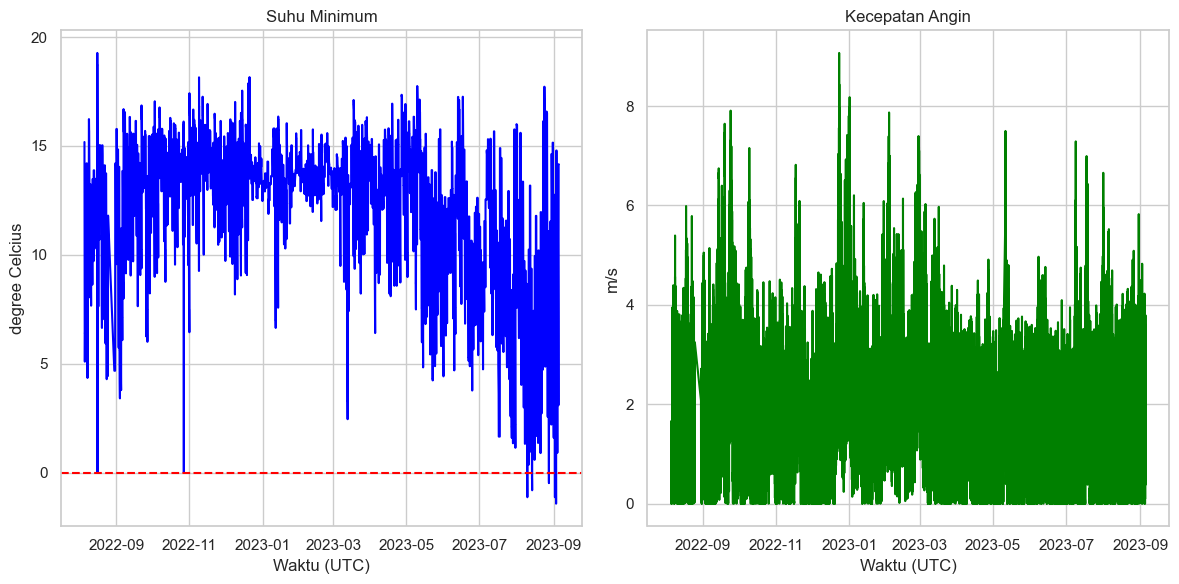

In [27]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Create a 1x2 grid of plots
fig, axes = plt.subplots(1,2, figsize=(12, 6))

# Plot the first Seaborn line plot on the left subplot
sns.lineplot(data=df['TT AIR MIN'], ax=axes[0], color='blue')
# Add a horizontal line at y = 10
axes[0].axhline(y=0, color='red', linestyle='--', label='Y = 10')
axes[0].set_title('Suhu Minimum')
axes[0].set_xlabel('Waktu (UTC)')
axes[0].set_ylabel('degree Celcius')

# Plot the second Seaborn line plot on the right subplot
sns.lineplot(data=df['WS AVG'], ax=axes[1], color='green')
axes[1].set_title('Kecepatan Angin')
axes[1].set_xlabel('Waktu (UTC)')
axes[1].set_ylabel('m/s')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

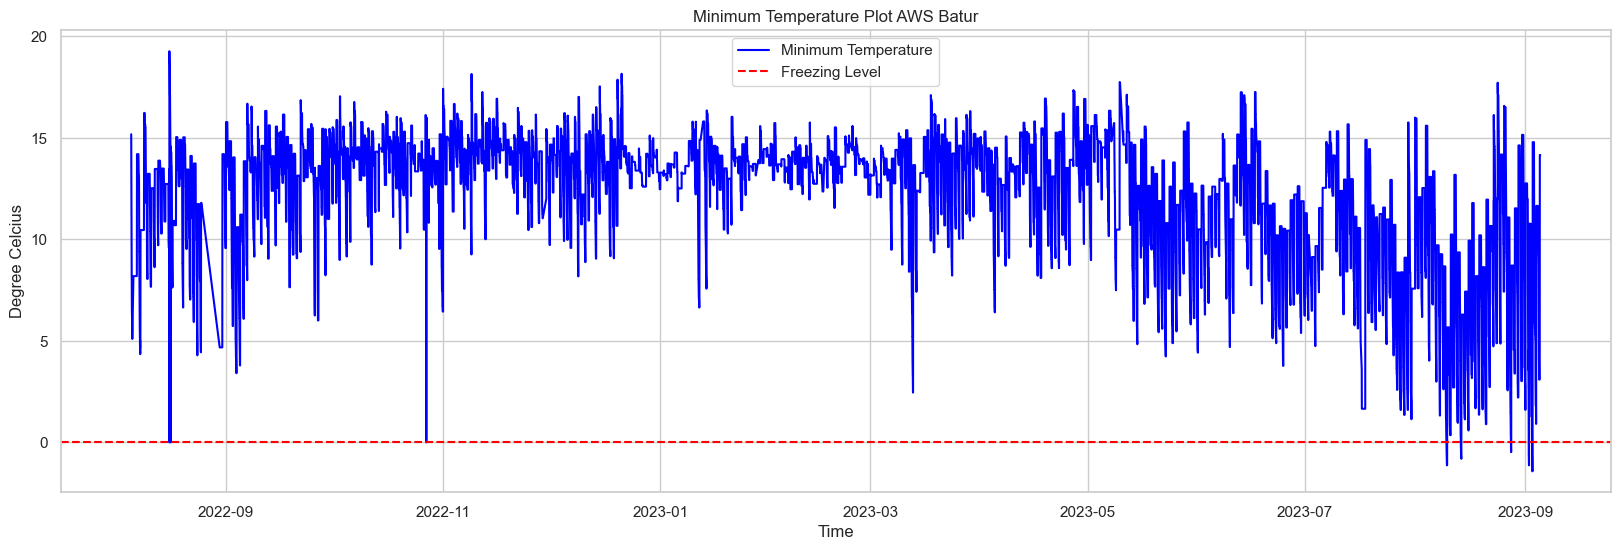

In [66]:
# Set the figure size
plt.figure(figsize=(20, 6))

sns.set(style="whitegrid")
# Create a line plot using Matplotlib
plt.plot(df['TT AIR MIN'], linestyle='-', color='blue', label='Minimum Temperature')

# Customize the plot
# Add a horizontal line at y = 10
plt.axhline(y=0, color='red', linestyle='--', label='Freezing Level')

plt.title('Minimum Temperature Plot AWS Batur')
plt.xlabel('Time')
plt.ylabel('Degree Celcius')
plt.legend()

# Show the plot
plt.show()

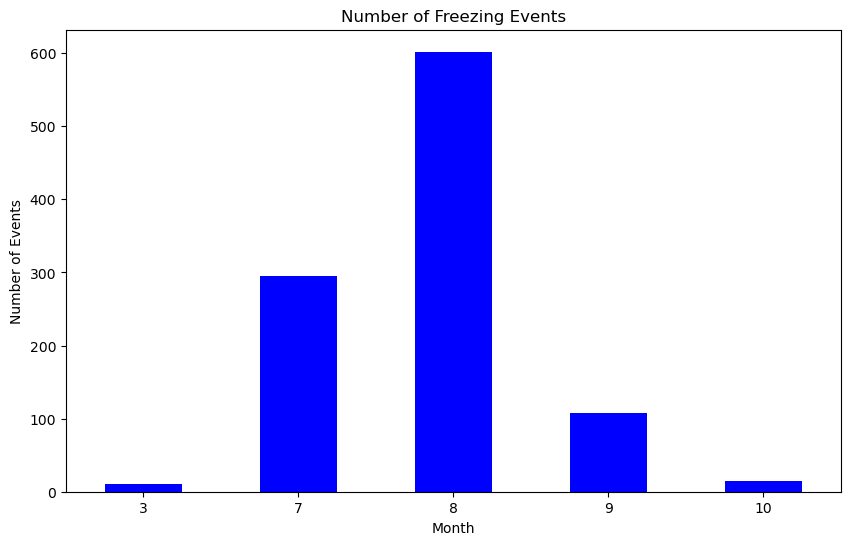

In [11]:
# Convert the 'date' column to datetime
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])
df['Month'] = df['TANGGAL'].dt.month
freezing_events = df[df['TT AIR MIN'] < 3.0].groupby('Month').size()


plt.figure(figsize=(10, 6))
freezing_events.plot(kind='bar', color='blue')
plt.title('Number of Freezing Events')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)  # Optionally, rotate x-axis labels if needed
plt.show()

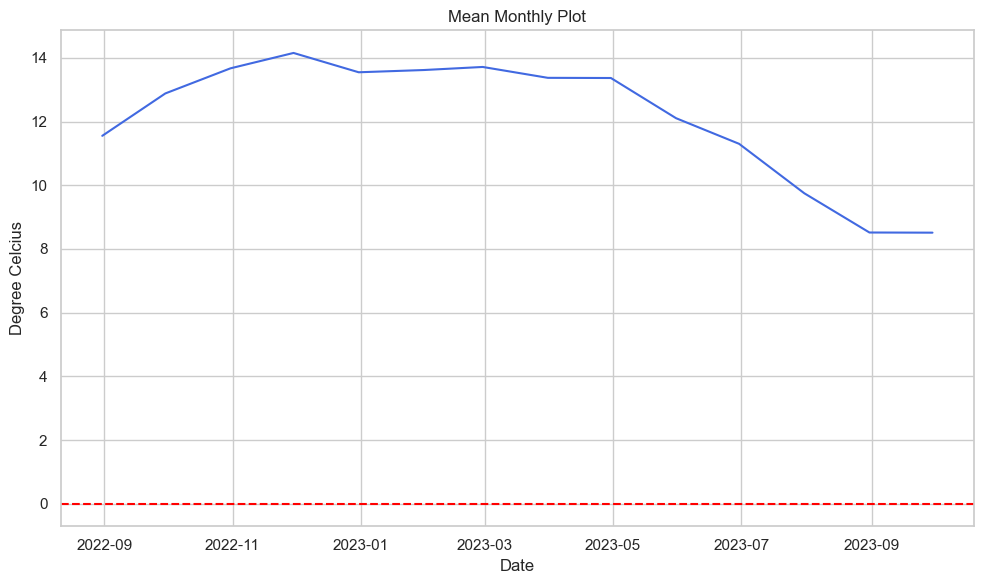

In [85]:
# Resample the data to monthly frequency and aggregate the values
monthly_data = df['TT AIR MIN'].resample('M').mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using Matplotlib
plt.plot(monthly_data.index, monthly_data, color='royalblue')
# Customize the plot
# Add a horizontal line at y = 10
plt.axhline(y=0, color='red', linestyle='--', label='nol derajat')

# Customize the plot
plt.title('Mean Monthly Plot')
plt.xlabel('Date')
plt.ylabel('Degree Celcius')

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
import matplotlib.pyplot as plt
start_date = '2023-07-02'
end_date = '2023-09-04'

# Set the figure size
plt.figure(figsize=(10, 6))

# Select the date range using loc[] and then plot the data
df.loc[start_date:end_date].plot(y='TT AIR MIN', kind='line')

# Add a horizontal line at y = 10
plt.axhline(y=0, color='red', linestyle='--', label='nol derajat')
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()


<Figure size 1000x600 with 0 Axes>

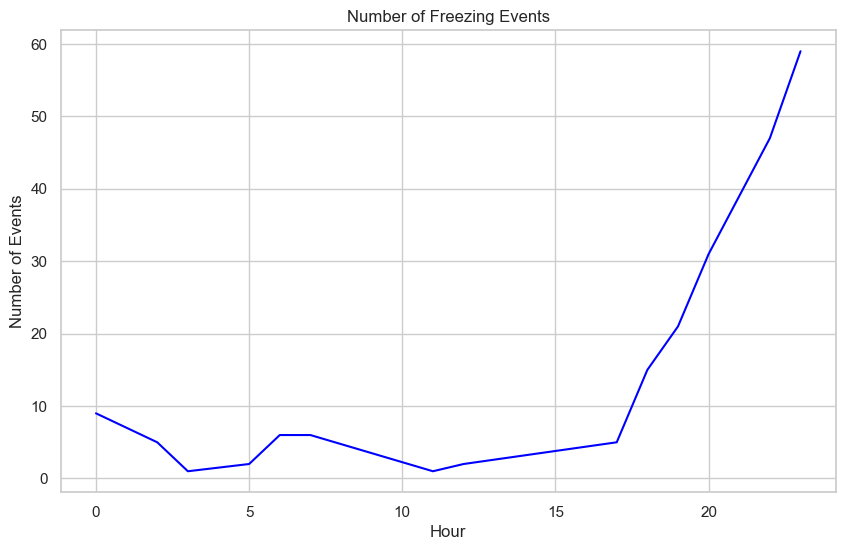

In [103]:
# Convert the 'date' column to datetime
# df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])
df['Hour'] = df['TANGGAL'].dt.hour
freezing_events = df[df['TT AIR MIN'] < 1].groupby('Hour').size()


plt.figure(figsize=(10, 6))
freezing_events.plot(kind='line', color='blue')
plt.title('Number of Freezing Events')
plt.xlabel('Hour')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)  # Optionally, rotate x-axis labels if needed
plt.show()

### Make Hourly Data

In [19]:
import pandas as pd

# Assuming you have a DataFrame with timestamp and weather data
# Replace 'your_dataframe' with your actual DataFrame
# Assuming your timestamp is in a column named 'timestamp'

# Sample DataFrame:
# df = pd.read_csv('your_weather_data.csv')

# Convert the 'timestamp' column to a datetime object (if it's not already)
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'timestamp' column as the index
# This is necessary for resampling to work properly
#df.set_index('date_time', inplace=True)

# Resample the data into hourly intervals and calculate the mean of each hour
hourly_weather_data = df[['TT AIR MIN', 'RH AVG', 'SR AVG']].resample('1H').min()

# You can also calculate other statistics like sum, max, min, etc., as needed.
# For example, to calculate the sum of precipitation over each hour:
# hourly_weather_data = df.resample('1H').sum()

# Reset the index to get the timestamp back as a column
#hourly_weather_data.reset_index(inplace=True)

# Save the resulting DataFrame to a new CSV file
#hourly_weather_data.to_csv('hourly_weather_data.csv', index=False)
hourly_weather_data


TT AIR MIN  RH AVG  SR AVG
date_time                                            
2021-01-01 08:00:00+00:00         NaN  100.10    18.7
2021-01-01 09:00:00+00:00         NaN   99.70    18.3
2021-01-01 10:00:00+00:00         NaN   99.20    17.9
2021-01-01 11:00:00+00:00         NaN   99.80    17.8
2021-01-01 12:00:00+00:00         NaN    1.70    17.8
...                               ...     ...     ...
2023-09-05 00:00:00+00:00       3.096   73.26   275.9
2023-09-05 01:00:00+00:00      14.160   73.17   561.0
2023-09-05 02:00:00+00:00      14.160   69.86   750.0
2023-09-05 03:00:00+00:00      14.160   69.13   588.7
2023-09-05 04:00:00+00:00      14.160   73.58  1087.0

[23445 rows x 3 columns]

In [20]:
hourly_weather_data.tail(20)

TT AIR MIN  RH AVG   SR AVG
date_time                                             
2023-09-04 09:00:00+00:00      11.650   67.11   105.60
2023-09-04 10:00:00+00:00      11.650   82.80     0.00
2023-09-04 11:00:00+00:00      11.350   94.90     0.00
2023-09-04 12:00:00+00:00      10.460   78.93     0.00
2023-09-04 13:00:00+00:00       9.960   62.74     0.00
2023-09-04 14:00:00+00:00       9.280   55.45     0.00
2023-09-04 15:00:00+00:00       8.900   58.45     0.00
2023-09-04 16:00:00+00:00       7.573   61.78     0.00
2023-09-04 17:00:00+00:00       6.085   65.20     0.00
2023-09-04 18:00:00+00:00       4.082   78.72     0.00
2023-09-04 19:00:00+00:00       3.096   88.70     0.00
2023-09-04 20:00:00+00:00       3.096   86.20     0.00
2023-09-04 21:00:00+00:00       3.096   48.87     0.00
2023-09-04 22:00:00+00:00       3.096   49.95     0.00
2023-09-04 23:00:00+00:00       3.096   69.34    12.83
2023-09-05 00:00:00+00:00       3.096   73.26   275.90
2023-09-05 01:00:00+00:00      14.160   73.17   561.00
2023-09-05 02:00:00+00:00      14.160   69.86   750.00
2023-09-05 03:00:00+00:00      14.160   69.13   588.70
2023-09-05 04:00:00+00:00      14.160   73.58  1087.00

In [28]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(hourly_weather_data, column_name):
    Q1 = hourly_weather_data[column_name].quantile(0.25)
    Q3 = hourly_weather_data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(hourly_weather_data[column_name] >= lower_bound) & (hourly_weather_data[column_name] <= upper_bound)]
    return df_filtered

# Specify the column from which you want to remove outliers
column_name = 'TT AIR MIN'

# Call the remove_outliers_iqr function
df_filtered = remove_outliers_iqr(hourly_weather_data, column_name)

# Reset the index of the DataFrame
df_filtered.reset_index(drop=True, inplace=True)

# Print the filtered DataFrame without outliers
print(df_filtered)

C:\Users\Deka\AppData\Local\Temp\ipykernel_30008\4096201852.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df[(hourly_weather_data[column_name] >= lower_bound) & (hourly_weather_data[column_name] <= upper_bound)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

c:\Users\Deka\anaconda3\envs\python9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Deka\anaconda3\envs\python9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Deka\anaconda3\envs\python9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Deka\anaconda3\envs\python9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

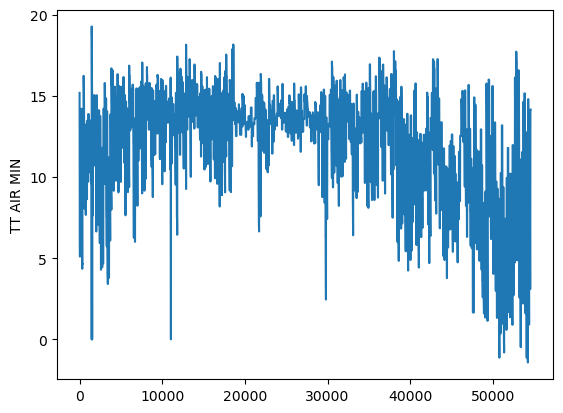

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Sample DataFrame
# data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 1, 3, 5]}
# df = pd.DataFrame(data)

# Create a line plot
sns.lineplot(data=df['TT AIR MIN'])
plt.show()
